In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [11]:
n_pts = 500
n=55
centers = [[-1,1],[-1,-1],[1,-1],[1,1],[0,0]]
X, y = datasets.make_blobs(n_samples=n_pts,random_state = 123, centers=centers, cluster_std = 0.4)
y_cat=to_categorical(y, 5)

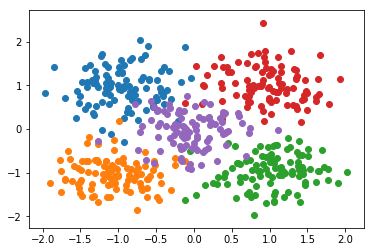

In [12]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

In [13]:
model =  Sequential()
model.add(Dense(units = 5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss= 'categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x=X, y=y_cat, verbose =1, batch_size = 50, epochs= 15)

Epoch 1/15
500/500 [==============================] - 0s 397us/step - loss: 1.0164 - acc: 0.6460
Epoch 2/15
500/500 [==============================] - 0s 37us/step - loss: 0.5293 - acc: 0.8800
Epoch 3/15
500/500 [==============================] - 0s 42us/step - loss: 0.3659 - acc: 0.9300
Epoch 4/15
500/500 [==============================] - 0s 43us/step - loss: 0.2973 - acc: 0.9440
Epoch 5/15
500/500 [==============================] - 0s 51us/step - loss: 0.2622 - acc: 0.9440
Epoch 6/15
500/500 [==============================] - 0s 46us/step - loss: 0.2417 - acc: 0.9420
Epoch 7/15
500/500 [==============================] - 0s 36us/step - loss: 0.2264 - acc: 0.9460
Epoch 8/15
500/500 [==============================] - 0s 38us/step - loss: 0.2173 - acc: 0.9460
Epoch 9/15
500/500 [==============================] - 0s 40us/step - loss: 0.2079 - acc: 0.9440
Epoch 10/15
500/500 [==============================] - 0s 38us/step - loss: 0.2000 - acc: 0.9500
Epoch 11/15
500/500 [=================

In [15]:
def plot_multiclass_decision_boundary(X,y_cat, model):
    x_span = np.linspace(min(X[:, 0])-1,max(X[:,0])+1)
    y_span = np.linspace(min(X[:, 1])-1,max(X[:,1])+1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_arr=model.predict_classes(grid)
    z = pred_arr.reshape(xx.shape)
    plt.contourf(xx,yy,z)

Prediction is:  [4]


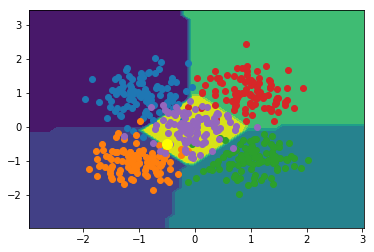

In [16]:

plot_multiclass_decision_boundary(X, y_cat, model)

plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

 
x1 = -0.5
y1 = -0.5
 
point = np.array([[x1, y1]])
prediction = model.predict_classes(point)
plt.plot([x1], [y1], marker='o', markersize=10, color="yellow")
print("Prediction is: ", prediction)